In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from datetime import timedelta

In [33]:
position_path = "./Data/"
data_path = "./Data/2020-09-29/CR6Data/"
output_path ="./"



'''Create single CR6 dataframe with datetime for comparisons'''
dict={}
for i in tqdm(range(5339,5392)): #create dataframe of all CR6 data
    outputsize = len(dict)
    
    df_CR6 = pd.read_table(data_path+"Younng10Hz"+str(i)+".dat",
                       sep=",",
                      skiprows=[0,2,3])

    for j in range(len(df_CR6)):
        if "." in df_CR6['TIMESTAMP'][j]:
            date = datetime.strptime(df_CR6['TIMESTAMP'][j], '%Y-%m-%d %H:%M:%S.%f')
            #print(date)
        else:
            date = datetime.strptime(df_CR6['TIMESTAMP'][j], '%Y-%m-%d %H:%M:%S')
            
        #dict[outputsize+j]={"Year":date.year,"Month":date.month,"Day":date.day,"Hour":date.hour,"Minute":date.minute,"Second":date.second+date.microsecond/1000000.,"Record":df_CR6['RECORD'][j],"U (m s^-1)":df_CR6['U'][j],"V (m s^-1)":df_CR6['V'][j],"W (m s^-1)":df_CR6['W'][j],"TSonic (K)":df_CR6['TSonic'][j],"RH (%)":df_CR6['RH'][j],"T_HMP60 (C)":df_CR6['T_HMP60'][j]}
        dict[outputsize+j]={"TIMESTAMP":date,"Record":df_CR6['RECORD'][j],"U (m s^-1)":df_CR6['U'][j],"V (m s^-1)":df_CR6['V'][j],"W (m s^-1)":df_CR6['W'][j],"TSonic (K)":df_CR6['TSonic'][j],"RH (%)":df_CR6['RH'][j],"T_HMP60 (C)":df_CR6['T_HMP60'][j]}    
            
        #output.loc[outputsize+j,output.columns]=[date.year,date.month,date.day,date.hour,date.minute,date.second+date.microsecond,df_CR6['RECORD'][j],df_CR6['U'][j],df_CR6['V'][j],df_CR6['W'][j],df_CR6['TSonic'][j],df_CR6['RH'][j],df_CR6['T_HMP60'][j]]
        #output = output.append(pd.Series([date.year,date.month,date.day,date.hour,date.minute,date.second+date.microsecond/1000000.,df_CR6['RECORD'][j],df_CR6['U'][j],df_CR6['V'][j],df_CR6['W'][j],df_CR6['TSonic'][j],df_CR6['RH'][j],df_CR6['T_HMP60'][j]], index=output.columns ), ignore_index=True)
    
df_CR6 = pd.DataFrame.from_dict(dict, "index")


'''START LOOP HERE!!!'''
inputFiles = ['2020-10-02 16-00.xlsx','2020-10-02 16-30.xlsx','2020-10-02 17-00.xlsx','2020-10-02 17-31.xlsx','2020-10-02 18-00.xlsx','2020-10-02 18-30.xlsx','2020-10-02 19-00.xlsx','2020-10-02 19-30.xlsx',
             '2020-10-02 20-00.xlsx','2020-10-02 20-30.xlsx','2020-10-02 21-00.xlsx','2020-10-02 21-30.xlsx','2020-10-02 22-00.xlsx','2020-10-02 22-30.xlsx','2020-10-02 23-00.xlsx','2020-10-02 23-30.xlsx',
             '2020-10-03 00-00.xlsx','2020-10-03 00-30.xlsx','2020-10-03 01-00.xlsx','2020-10-03 01-30.xlsx','2020-10-03 02-00.xlsx','2020-10-03 02-30.xlsx','2020-10-03 03-0.xlsx','2020-10-03 03-30.xlsx',
             '2020-10-03 04-00.xlsx','2020-10-03 04-30.xlsx','2020-10-03 05-00.xlsx','2020-10-03 05-30.xlsx','2020-10-03 06-00.xlsx','2020-10-03 06-30.xlsx', '2020-10-03 07-00.xlsx','2020-10-03 07-30.xlsx',
             '2020-10-08 08-00.xlsx','2020-10-08 08-30.xlsx','2020-10-08 09-00.xlsx','2020-10-08 09-30.xlsx','2020-10-08 10-00.xlsx','2020-10-08 10-30.xlsx','2020-10-08 11-00.xlsx','2020-10-08 11-30.xlsx',
             '2020-10-08 12-00.xlsx','2020-10-08 12-30.xlsx','2020-10-08 13-00.xlsx','2020-10-08 13-30.xlsx','2020-10-08 14-00.xlsx','2020-10-08 14-30.xlsx','2020-10-08 15-00.xlsx','2020-10-02 15-30.xlsx']

outputFiles = ['16-00','16-30','17-00','17-30','18-00','18-30','19-00','19-30',
               '20-00','20-30','21-00','21-30','22-00','22-30','23-00','23-30',
              '00-00','00-30','01-00','01-30','02-00','02-30','03-00','03-30',
              '04-00','04-30','05-00','05-30','06-00','06-30','07-00','07-30',
              '08-00','08-30','09-00','09-30','10-00','10-30','11-00','11-30',
              '12-00','12-30','13-00','13-30','14-00','14-30','15-00','15-30']

for i in tqdm(len(inputFiles)):
    df_pos = pd.read_excel(position_path+inputFiles[i], header=None)
    df_pos.columns = ['TIMESTAMP', 'X', 'Y', 'THETA']

    '''Create proper timestamps for position'''
    dict ={}
    for i in tqdm(range(len(df_pos))):
        dict[i]={'TIMESTAMP': datetime.fromordinal(int(df_pos['TIMESTAMP'][i])) + timedelta(days=df_pos['TIMESTAMP'][i]%1) - timedelta(days = 366),'X':df_pos['X'][i],'Y':df_pos['Y'][i],'THETA':df_pos['THETA'][i]}
    df_pos = pd.DataFrame.from_dict(dict, "index")



    '''Trim CR6 data based on timestamps from position data. Use new dataframe.'''
    df_CR6_trim=df_CR6

    for i in tqdm(range((df_CR6_trim['TIMESTAMP']-df_pos['TIMESTAMP'].iloc[-1]).abs().argsort()[:2].iloc[1],len(df_CR6))):
        df_CR6_trim.drop(i, inplace=True)

    for i in tqdm(range(0,(df_CR6_trim['TIMESTAMP']-df_pos['TIMESTAMP'].iloc[0]).abs().argsort()[:2].iloc[0])):
        df_CR6_trim.drop(i, inplace=True)

    df_CR6_trim.reset_index(inplace=True, drop=True)


    '''Create a combined database'''
    dict={}
    for i in tqdm(range(len(df_CR6))):
        date = df_CR6_trim["TIMESTAMP"].iloc[i]
        index = (df_pos['TIMESTAMP']-date).abs().argsort()[:2].iloc[1]

        x = df_pos['X'].iloc[index]
        y = df_pos['Y'].iloc[index]
        theta = df_pos['THETA'].iloc[index]

        dict[i]= {"Year":date.year,"Month":date.month,"Day":date.day,"Hour":date.hour,
                  "Minute":date.minute,"Second":date.second+date.microsecond/1000000.,
                  "x":x,"y":y,"theta":theta,
                  "Record":df_CR6_trim['Record'][i],"U (m s^-1)":df_CR6_trim['U (m s^-1)'][i],"V (m s^-1)":df_CR6_trim['V (m s^-1)'][i],
                  "W (m s^-1)":df_CR6_trim['W (m s^-1)'][i],"TSonic (K)":df_CR6_trim['TSonic (K)'][i],"RH (%)":df_CR6_trim['RH (%)'][i],
                  "T_HMP60 (C)":df_CR6_trim['T_HMP60 (C)'][i]}


    df_comb = pd.DataFrame.from_dict(dict, "index")


    '''Create MultiIndex based on each point'''
    point_dict={'p1':[2.8,0.7,0], 'p2':[6.0,0.7,0], 'p3':[6.0,4.4,0], 'p4':[2.8,4.4,0],
               'p5':[6.0,7.9,0], 'p6':[2.8,7.9,0], 'p7':[6.0,10.6,0], 'p8':[4.9,11.8,0]}

    drop=20 #frequency*seconds to drop, make sure the robot is in the correct positon

    dict={'p1':{},'p2':{},'p3':{},'p4':{},'p5':{},'p6':{},'p7':{},'p8':{}}

    for i in tqdm(range(drop, len(df_comb))):
        if ([df_comb['x'].iloc[i-drop],df_comb['y'].iloc[i-drop],df_comb['theta'].iloc[i-drop]] and
           [df_comb['x'].iloc[i],df_comb['y'].iloc[i],df_comb['theta'].iloc[i]]) in point_dict.values(): #Check that it has been there for a while

            point = list(point_dict.keys())[list(point_dict.values()).index([df_comb['x'].iloc[i],df_comb['y'].iloc[i],df_comb['theta'].iloc[i]])] #get the point

            dict[point][i]=df_comb.iloc[i].to_dict()


    dict_of_df = {k: pd.DataFrame(v) for k,v in dict.items()}
    output = pd.concat(dict_of_df, axis=1).transpose()
    output.to_csv('./Data/Binned Data/'+outputFiles[i]+'.csv',index=True)


100%|██████████████████████████████████████████████████████████████████████████| 17612/17612 [00:03<00:00, 5407.63it/s]


In [31]:
output.to_csv('./Data/Binned Data/'+outputFiles[i],index=True)

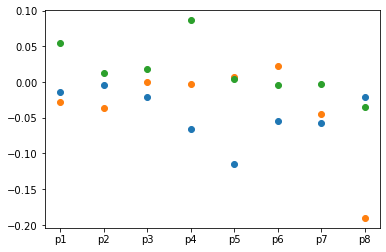

In [3]:
keys=['p1','p2','p3','p4','p5','p6','p7','p8']

plt.scatter(keys,[np.average(output['U (m s^-1)'].loc[i]) for i in keys])
plt.scatter(keys,[np.average(output['V (m s^-1)'].loc[i]) for i in keys])
plt.scatter(keys,[np.average(output['W (m s^-1)'].loc[i]) for i in keys])

plt.show()



In [11]:
type(output)

pandas.core.frame.DataFrame

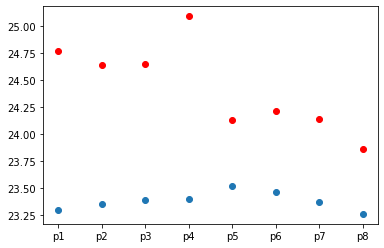

In [10]:
keys=['p1','p2','p3','p4','p5','p6','p7','p8']

plt.scatter(keys,[np.average(output['TSonic (K)'].loc[i])-273 for i in keys], color='red')
plt.scatter(keys,[np.average(output['T_HMP60 (C)'].loc[i]) for i in keys])

plt.show()

In [15]:
output

Year  Month   Day  Hour  Minute  Second    x     y  theta  \
p1 291    2020.0    9.0  29.0  11.0    42.0    55.9  2.8   0.7    0.0   
   292    2020.0    9.0  29.0  11.0    42.0    56.0  2.8   0.7    0.0   
   293    2020.0    9.0  29.0  11.0    42.0    56.1  2.8   0.7    0.0   
   294    2020.0    9.0  29.0  11.0    42.0    56.2  2.8   0.7    0.0   
   295    2020.0    9.0  29.0  11.0    42.0    56.3  2.8   0.7    0.0   
...          ...    ...   ...   ...     ...     ...  ...   ...    ...   
p8 17627  2020.0    9.0  29.0  12.0    11.0    49.5  4.9  11.8    0.0   
   17628  2020.0    9.0  29.0  12.0    11.0    49.6  4.9  11.8    0.0   
   17629  2020.0    9.0  29.0  12.0    11.0    49.7  4.9  11.8    0.0   
   17630  2020.0    9.0  29.0  12.0    11.0    49.8  4.9  11.8    0.0   
   17631  2020.0    9.0  29.0  12.0    11.0    49.9  4.9  11.8    0.0   

             Record  U (m s^-1)  V (m s^-1)  W (m s^-1)  TSonic (K)  RH (%)  \
p1 291    3230531.0      -0.048      -0.193      -0.005       297.6   43.34   
   292    3230532.0      -0.047      -0.192      -0.006       297.7   43.33   
   293    3230533.0      -0.017      -0.231       0.005       297.7   43.32   
   294    3230534.0      -0.017      -0.232       0.005       297.7   43.34   
   295    3230535.0      -0.017      -0.231       0.005       297.7   43.31   
...             ...         ...         ...         ...         ...     ...   
p8 17627  3247867.0       0.031      -0.071       0.117       296.8   43.42   
   17628  3247868.0       0.002      -0.125       0.083       296.7   43.42   
   17629  3247869.0       0.002      -0.125       0.083       296.7   43.47   
   17630  3247870.0       0.002      -0.125       0.083       296.7   43.42   
   17631  3247871.0       0.153      -0.134       0.083       296.8   43.42   

          T_HMP60 (C)  
p1 291          23.29  
   292          23.27  
   293          23.29  
   294          23.28  
   295          23.28  
...               ...  
p8 17627        23.18  
   17628        23.18  
   17629        23.24  
   17630        23.18  
   17631        23.18  

[16245 rows x 16 columns]

In [16]:
dict

{'p1': {291: {'Year': 2020.0,
   'Month': 9.0,
   'Day': 29.0,
   'Hour': 11.0,
   'Minute': 42.0,
   'Second': 55.9,
   'x': 2.8,
   'y': 0.7,
   'theta': 0.0,
   'Record': 3230531.0,
   'U (m s^-1)': -0.048,
   'V (m s^-1)': -0.193,
   'W (m s^-1)': -0.005,
   'TSonic (K)': 297.6,
   'RH (%)': 43.34,
   'T_HMP60 (C)': 23.29},
  292: {'Year': 2020.0,
   'Month': 9.0,
   'Day': 29.0,
   'Hour': 11.0,
   'Minute': 42.0,
   'Second': 56.0,
   'x': 2.8,
   'y': 0.7,
   'theta': 0.0,
   'Record': 3230532.0,
   'U (m s^-1)': -0.047,
   'V (m s^-1)': -0.192,
   'W (m s^-1)': -0.006,
   'TSonic (K)': 297.7,
   'RH (%)': 43.33,
   'T_HMP60 (C)': 23.27},
  293: {'Year': 2020.0,
   'Month': 9.0,
   'Day': 29.0,
   'Hour': 11.0,
   'Minute': 42.0,
   'Second': 56.1,
   'x': 2.8,
   'y': 0.7,
   'theta': 0.0,
   'Record': 3230533.0,
   'U (m s^-1)': -0.017,
   'V (m s^-1)': -0.231,
   'W (m s^-1)': 0.005,
   'TSonic (K)': 297.7,
   'RH (%)': 43.32,
   'T_HMP60 (C)': 23.29},
  294: {'Year': 2020.0,

In [28]:
tempdf = pd.DataFrame.from_dict({(i,j): dict[i][j] 
                            for i in dict.keys() 
                            for j in dict[i].keys()},
                            orient='index')

tempdf.index = pd.MultiIndex.from_tuples(tempdf.index)

In [29]:
type(tempdf)

pandas.core.frame.DataFrame

In [23]:
output.to_csv(index=False)

'Year,Month,Day,Hour,Minute,Second,x,y,theta,Record,U (m s^-1),V (m s^-1),W (m s^-1),TSonic (K),RH (%),T_HMP60 (C)\r\n2020.0,9.0,29.0,11.0,42.0,55.9,2.8,0.7,0.0,3230531.0,-0.048,-0.193,-0.005,297.6,43.34,23.29\r\n2020.0,9.0,29.0,11.0,42.0,56.0,2.8,0.7,0.0,3230532.0,-0.047,-0.192,-0.006,297.7,43.33,23.27\r\n2020.0,9.0,29.0,11.0,42.0,56.1,2.8,0.7,0.0,3230533.0,-0.017,-0.231,0.005,297.7,43.32,23.29\r\n2020.0,9.0,29.0,11.0,42.0,56.2,2.8,0.7,0.0,3230534.0,-0.017,-0.23199999999999998,0.005,297.7,43.34,23.28\r\n2020.0,9.0,29.0,11.0,42.0,56.3,2.8,0.7,0.0,3230535.0,-0.017,-0.231,0.005,297.7,43.31,23.28\r\n2020.0,9.0,29.0,11.0,42.0,56.4,2.8,0.7,0.0,3230536.0,-0.019,-0.23199999999999998,0.005,297.7,43.33,23.29\r\n2020.0,9.0,29.0,11.0,42.0,56.5,2.8,0.7,0.0,3230537.0,-0.018000000000000002,-0.23199999999999998,0.005,297.7,43.33,23.27\r\n2020.0,9.0,29.0,11.0,42.0,56.6,2.8,0.7,0.0,3230538.0,-0.008,-0.20199999999999999,0.035,297.7,43.31,23.29\r\n2020.0,9.0,29.0,11.0,42.0,56.7,2.8,0.7,0.0,3230539.0,-0.0

In [30]:
arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
pd.MultiIndex.from_arrays(arrays, names=('number', 'color'))

MultiIndex([(1,  'red'),
            (1, 'blue'),
            (2,  'red'),
            (2, 'blue')],
           names=['number', 'color'])